# Question 1

Part 1

In [48]:
# MySQL Connection parameters
import pymysql
databaseServerIP = 'localhost'
databaseServerPort = 8889
databaseUsername = 'root'
databaseUserPassword = 'root'
newDatabaseName = 'INFO5717'
charSet = 'utf8mb4'
cursorType = pymysql.cursors.DictCursor
# Create database connection instance
connectionInstance = pymysql.connect(host=databaseServerIP,
                                     port=databaseServerPort,
                                     user=databaseUsername,
                                     password=databaseUserPassword,
                                     charset=charSet,
                                     cursorclass=cursorType)

# Tweepy connection parameters
import tweepy
consumer_key = "kDBL42PbrIshNFCFja9EdCw3Y"
consumer_secret = "N2mMukJuTb4Eqf4VgGFKskCMqIiVmmYINeeRZjAspSLN5G9n2N"
access_token = "59545908-VzCoL1i9t9mFHJvOcX3DFJorXLnxjgTmoPe8kLh3D"
access_token_secret = "3amUHLJGHH4x2IFmk4VUgVDw6mf0TxyQNh01eQXLtikRw"
# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth)

try:
    # Create a cursor object
    cursorInstance = connectionInstance.cursor()
    # Remove existing database
    cursorInstance.execute("DROP DATABASE IF EXISTS "+newDatabaseName)
    # SQL Statement to create a database
    sqlStatement = "CREATE DATABASE "+newDatabaseName  
    # Execute the create database SQL statment through the cursor instance
    cursorInstance.execute(sqlStatement)
    # Select newly created database
    sqlStatement = "USE "+newDatabaseName
    # Execute SQL statement
    cursorInstance.execute(sqlStatement)
    # SQL Statement to create new table
    sqlStatement = "CREATE TABLE IF NOT EXISTS Users(id INT PRIMARY KEY AUTO_INCREMENT, ScreenName VARCHAR(32), UserName VARCHAR(32), UserLocation VARCHAR(32), UserDescription TINYTEXT, Number_of_Followers INT, Number_of_Friends INT, Number_of_Statuses INT, UserURL VARCHAR(255))"
    # Execute the create table SQL statment through the cursor instance
    cursorInstance.execute(sqlStatement)
    # Insert single user as an example
    test_user = api.me()
    user_info = [test_user.name,
                 test_user.screen_name,
                 test_user.location,
                 test_user.description,
                 test_user.followers_count,
                 test_user.friends_count,
                 test_user.statuses_count,
                 test_user.url]
    cursorInstance.execute("INSERT INTO Users VALUES(1,%s,%s,%s,%s,%s,%s,%s,%s)", user_info)
    connectionInstance.commit()
    
    # SQL statement to show table
    sqlQuery = "SELECT * FROM Users"
    # Execute the sqlQuery
    cursorInstance.execute(sqlQuery)
    #Fetch all the rows
    rows = cursorInstance.fetchall()
    for row in rows:
        print(row)
except Exception as e:
    print("Exeception occured:{}".format(e))
finally:
    connectionInstance.close()

{'id': 1, 'ScreenName': 'Julian', 'UserName': 'jquint1400', 'UserLocation': 'Denton, TX', 'UserDescription': 'Engineering graduate at UNT.', 'Number_of_Followers': 37, 'Number_of_Friends': 246, 'Number_of_Statuses': 74, 'UserURL': 'http://t.co/QcYe4Da7At'}


Part 2

In [49]:
# MySQL Connection parameters
import pymysql
databaseServerIP = 'localhost'
databaseServerPort = 8889
databaseUsername = 'root'
databaseUserPassword = 'root'
databaseName = 'INFO5717'
charSet = 'utf8mb4'
cursorType = pymysql.cursors.DictCursor
# Create database connection instance
connectionInstance = pymysql.connect(host=databaseServerIP,
                                     port=databaseServerPort,
                                     user=databaseUsername,
                                     password=databaseUserPassword,
                                     charset=charSet,
                                     cursorclass=cursorType,
                                     db=databaseName)

# Tweepy connection parameters
import tweepy
consumer_key = "kDBL42PbrIshNFCFja9EdCw3Y"
consumer_secret = "N2mMukJuTb4Eqf4VgGFKskCMqIiVmmYINeeRZjAspSLN5G9n2N"
access_token = "59545908-VzCoL1i9t9mFHJvOcX3DFJorXLnxjgTmoPe8kLh3D"
access_token_secret = "3amUHLJGHH4x2IFmk4VUgVDw6mf0TxyQNh01eQXLtikRw"
# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth)

try:
    # Create a cursor object
    cursorInstance = connectionInstance.cursor()
    # Create list of ten users
    users = ["BarackObama",
             "friedmanjon",
             "AnnaKendrick47",
             "arzE",
             "BjNovak",
             "DonaldGlover",
             "williamtracy",
             "darthvader",
             "azizansari",
             "perezhilton"]
    # Extract user info from twitter
    for user in users:
        user_data = api.get_user(user)
        user_info = [user_data.name,
                     user_data.screen_name,
                     user_data.location,
                     user_data.description,
                     user_data.followers_count,
                     user_data.friends_count,
                     user_data.statuses_count,
                     user_data.url]
        # Insert user data into database table
        cursorInstance.execute("INSERT INTO Users(ScreenName, UserName, UserLocation, UserDescription, Number_of_Followers, Number_of_Friends, Number_of_Statuses, UserURL) VALUES(%s,%s,%s,%s,%s,%s,%s,%s)", user_info)
        connectionInstance.commit()
    
    # SQL statement to show table
    sqlQuery = "SELECT * FROM Users"
    # Execute the sqlQuery
    cursorInstance.execute(sqlQuery)
    #Fetch all the rows
    rows = cursorInstance.fetchall()
    for row in rows:
        print(row)
except Exception as e:
    print("Exeception occured:{}".format(e))
finally:
    connectionInstance.close()

{'id': 1, 'ScreenName': 'Julian', 'UserName': 'jquint1400', 'UserLocation': 'Denton, TX', 'UserDescription': 'Engineering graduate at UNT.', 'Number_of_Followers': 37, 'Number_of_Friends': 246, 'Number_of_Statuses': 74, 'UserURL': 'http://t.co/QcYe4Da7At'}
{'id': 2, 'ScreenName': 'Barack Obama', 'UserName': 'BarackObama', 'UserLocation': 'Washington, DC', 'UserDescription': 'Dad, husband, President, citizen.', 'Number_of_Followers': 110357815, 'Number_of_Friends': 610803, 'Number_of_Statuses': 15688, 'UserURL': 'https://t.co/93Y27HEnnX'}
{'id': 3, 'ScreenName': 'Jon Friedman', 'UserName': 'friedmanjon', 'UserLocation': 'LA & NYC', 'UserDescription': 'comedy writer + producer, ny mets fan. • “The Rejection Show” at the NY Comedy Fest, 11/6 at Chelsea Music Hall https://t.co/5x5UpOpLUf', 'Number_of_Followers': 63555, 'Number_of_Friends': 4659, 'Number_of_Statuses': 9686, 'UserURL': 'https://t.co/NhxFb3dKrK'}
{'id': 4, 'ScreenName': 'Anna Kendrick', 'UserName': 'AnnaKendrick47', 'UserLoca

Part 3

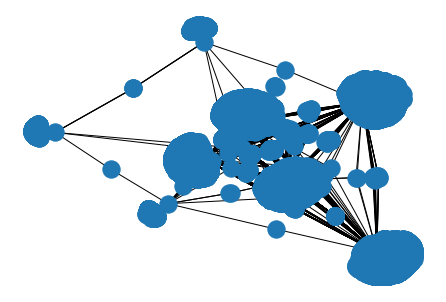

In [80]:
import tweepy

# Tweepy connection parameters
consumer_key = "kDBL42PbrIshNFCFja9EdCw3Y"
consumer_secret = "N2mMukJuTb4Eqf4VgGFKskCMqIiVmmYINeeRZjAspSLN5G9n2N"
access_token = "59545908-VzCoL1i9t9mFHJvOcX3DFJorXLnxjgTmoPe8kLh3D"
access_token_secret = "3amUHLJGHH4x2IFmk4VUgVDw6mf0TxyQNh01eQXLtikRw"
# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth, wait_on_rate_limit=True)

# Get authenticated user info
user = api.me()
# Create list to store network connections
network_connections = []
# Store connection pairs as list of tuples
counter_i = 1 # Use counter to stop loop after 10 connections
counter_j = 1
for follower in api.followers_ids():
    connect = (user.id,follower)
    network_connections.append(connect)
    for friend in api.followers_ids(follower):
        connect_ = (follower,friend)
        network_connections.append(connect_)
        counter_i+=1
        if counter_i == 5: break
    counter_j+=1
    if counter_j == 10: break

x,y = zip(*network_connections)

# Plot libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# Build dataframe for the connections
df = pd.DataFrame({ 'from':x, 'to':y})
 
# Build the graph
G=nx.from_pandas_edgelist(df, 'from', 'to')
 
# Plot the graph
nx.draw(G)

Part 4

In [65]:
import tweepy
import json

# Tweepy connection parameters
consumer_key = "kDBL42PbrIshNFCFja9EdCw3Y"
consumer_secret = "N2mMukJuTb4Eqf4VgGFKskCMqIiVmmYINeeRZjAspSLN5G9n2N"
access_token = "59545908-VzCoL1i9t9mFHJvOcX3DFJorXLnxjgTmoPe8kLh3D"
access_token_secret = "3amUHLJGHH4x2IFmk4VUgVDw6mf0TxyQNh01eQXLtikRw"
# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth)

# Perform search for part A
search_a = api.search(q="Texas AND weather",count=100)
# Save results from search A to json file
with open("search_results_a.json","a+") as file:
    for tweet in search_a:
        json.dump(tweet._json, file)
        file.write('\n')

# Perform search for part B
search_b = api.search(q="#UNT",count=100,since='2019-11-15', until='2019-11-21')
# Save results from search B to json file
with open("search_results_b.json","a+") as file:
    for tweet in search_b:
        json.dump(tweet._json, file)
        file.write('\n')
        
# Perform search for part C
search_c = api.search(geocode="41.6746991,-86.3459236,50mi",count=100)
# Save results from search C to json file
with open("search_results_c.json","a+") as file:
    for tweet in search_c:
        json.dump(tweet._json, file)
        file.write('\n')

# Question 2

Part 1

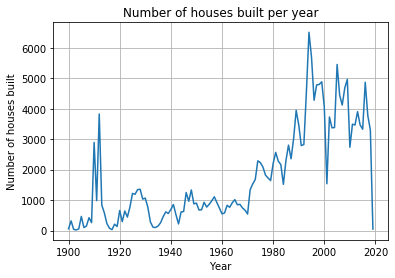

In [18]:
import csv
builds_per_year = {} # Dictionary to store number of houses built per year
# Open input file for reading
with open("assignment_4_property_tax_report_2019.csv",'r') as input_file:
    file_reader = csv.reader(input_file) # Create file reading variable
    next(file_reader) # Skip header
    for row in file_reader: # Loop to read each row from the file
        # Count only the houses containing values for "YEAR_BUILT"
        if row[24]:
            # Only include houses built after 1900
            if int(row[24]) >= 1900:
                if int(row[24]) in builds_per_year:
                    builds_per_year[int(row[24])] +=1
                else:
                    builds_per_year[int(row[24])] = 1

# Plot data onto the graph
import matplotlib.pyplot as plt
builds_per_year_sorted = sorted(builds_per_year.items())
x,y = zip(*builds_per_year_sorted)
plt.plot(x,y)
plt.xlabel('Year')
plt.ylabel('Number of houses built')
plt.title('Number of houses built per year')
plt.grid()
plt.show()

Part 2

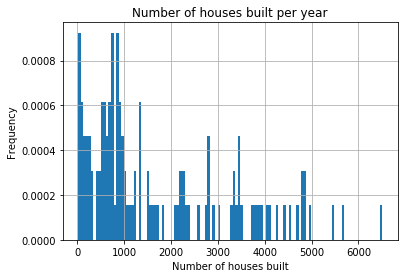

In [30]:
import csv
builds_per_year = {} # Dictionary to store number of houses built per year
# Open input file for reading
with open("assignment_4_property_tax_report_2019.csv",'r') as input_file:
    file_reader = csv.reader(input_file) # Create file reading variable
    next(file_reader) # Skip header
    for row in file_reader: # Loop to read each row from the file
        # Count only the houses containing values for "YEAR_BUILT"
        if row[24]:
            # Only include houses built after 1900
            if int(row[24]) >= 1900:
                if int(row[24]) in builds_per_year:
                    builds_per_year[int(row[24])] +=1
                else:
                    builds_per_year[int(row[24])] = 1

# Plot data onto the histogram
import matplotlib.pyplot as plt
builds_per_year_sorted = sorted(builds_per_year.items())
x,y = zip(*builds_per_year_sorted)
plt.hist(y, density=1, bins=len(x))
plt.xlabel('Number of houses built')
plt.ylabel('Frequency')
plt.title('Number of houses built per year')
plt.grid()
plt.show()

Part 3

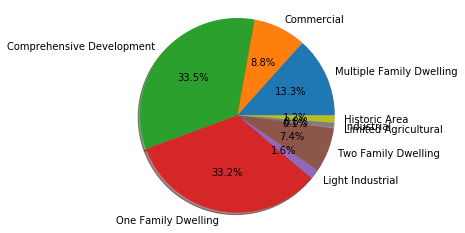

In [46]:
import csv
zone_categories = {} # Dictionary to store number of houses per zone categorie
# Open input file for reading
with open("assignment_4_property_tax_report_2019.csv",'r') as input_file:
    file_reader = csv.reader(input_file) # Create file reading variable
    next(file_reader) # Skip header
    for row in file_reader: # Loop to read each row from the file
        # Count only the houses containing values for "ZONE_CATEGORY"
        if row[5]:
            # If category exists, add one to it
            if row[5] in zone_categories:
                zone_categories[row[5]] +=1
            else: # If category does not exist, add it to dictionary
                zone_categories[row[5]] = 1

# Plot data onto pie chart
import matplotlib.pyplot as plt
labels = list(zone_categories.keys())
sizes = list(zone_categories.values())
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')

plt.show()

Part 4

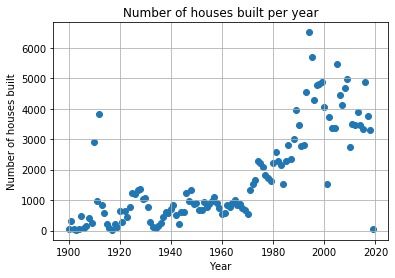

In [47]:
import csv
builds_per_year = {} # Dictionary to store number of houses built per year
# Open input file for reading
with open("assignment_4_property_tax_report_2019.csv",'r') as input_file:
    file_reader = csv.reader(input_file) # Create file reading variable
    next(file_reader) # Skip header
    for row in file_reader: # Loop to read each row from the file
        # Count only the houses containing values for "YEAR_BUILT"
        if row[24]:
            # Only include houses built after 1900
            if int(row[24]) >= 1900:
                if int(row[24]) in builds_per_year:
                    builds_per_year[int(row[24])] +=1
                else:
                    builds_per_year[int(row[24])] = 1

# Plot data onto the graph
import matplotlib.pyplot as plt
builds_per_year_sorted = sorted(builds_per_year.items())
x,y = zip(*builds_per_year_sorted)
plt.scatter(x,y)
plt.xlabel('Year')
plt.ylabel('Number of houses built')
plt.title('Number of houses built per year')
plt.grid()
plt.show()